# Decision trees on random dataset

A decision tree is a decision support hierarchical model that uses a tree-like model of decisions and their possible consequences, including chance event outcomes, resource costs, and utility. It is one way to display an algorithm that only contains conditional control statements.

**Explanation of the Steps:**
1. Dataset: We are using randomly generated dataset.

2. Train-Test Split: The data is split into training and testing sets (80% training, 20% testing).

3. Model Training: A DecisionTreeClassifier is created and trained using the training data.

4. Prediction: The model makes predictions on the test data.

5. Evaluation: Various metrics like accuracy, precision, recall, and F1 score are calculated to evaluate the model’s performance.

6. Confusion Matrix: The confusion matrix helps visualize how many true/false positive/negative predictions the model has made.

7. Decision Tree Plot: A visualization of the decision tree is plotted, which shows how the model makes splits based on the features.

8. Interactive Depth Adjustment: Using ipywidgets, we provide an interactive slider to adjust the max_depth of the decision tree and observe how it affects the accuracy and structure of the tree.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from ipywidgets import interact, IntSlider, FloatSlider
import ipywidgets as widgets

In [2]:
# Generate synthetic categorical data
def generate_categorical_data(n_samples=400):
    np.random.seed(35)
    # Create synthetic features with categorical data
    data = {
        'Feature1': np.random.choice(['A', 'B', 'C'], n_samples),
        'Feature2': np.random.choice(['D', 'E', 'F'], n_samples),
        'Feature3': np.random.choice(['G', 'H', 'I'], n_samples)
    }
    df = pd.DataFrame(data)
    # Target variable based on simple rules
    conditions = [
        (df['Feature1'] == 'A') & (df['Feature2'] == 'D'),
        (df['Feature1'] == 'B') & (df['Feature3'] == 'H'),
        (df['Feature1'] == 'C') & (df['Feature2'] == 'E')
    ]
    choices = [0, 1, 2]  # Class labels
    df['Target'] = np.select(conditions, choices, default=3)
    return df

In [3]:
# Preprocessing function to convert categorical data to one-hot encoded data
def preprocess_data(df):
    # Apply one-hot encoding to the categorical columns
    df_encoded = pd.get_dummies(df, columns=['Feature1', 'Feature2', 'Feature3'])
    return df_encoded

In [4]:
# Generate
df = generate_categorical_data(n_samples = 1200)
df.head()

,Feature1,Feature2,Feature3,Target
0,B,D,I,3
1,A,D,G,0
2,B,D,I,3
3,A,D,I,0
4,A,E,G,3


In [5]:
# preprocess data
df = preprocess_data(df)
df.head()

,Target,Feature1_A,Feature1_B,Feature1_C,Feature2_D,Feature2_E,Feature2_F,Feature3_G,Feature3_H,Feature3_I
0,3,False,True,False,True,False,False,False,False,True
1,0,True,False,False,True,False,False,True,False,False
2,3,False,True,False,True,False,False,False,False,True
3,0,True,False,False,True,False,False,False,False,True
4,3,True,False,False,False,True,False,True,False,False


In [10]:
X, y = df.drop('Target', axis=1), df['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=35)

# Function to train the model and visualize the confusion matrix and decision tree
def train_and_visualize(max_depth=3):
    # Initialize and train the Decision Tree Classifier
    tree = DecisionTreeClassifier(max_depth=max_depth, random_state=35)
    tree.fit(X_train, y_train)

    # Predict on the test set
    y_pred = tree.predict(X_test)


    # Plotting the decision tree
    plt.figure(figsize=(20, 10))
    plot_tree(tree, filled=True, feature_names=X.columns.tolist(), class_names=list(np.unique(y).astype(str)))
    plt.title('Decision Tree Structure')
    plt.show()

    # Printing the classification report including metrics such as precision, recall, and F1-score
    print(classification_report(y_test, y_pred, target_names=np.unique(y).astype(str)))

    # Calculating additional classification metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Printing calculated metrics
    print(f"Accuracy: {accuracy:.3f}")
    print(f"Precision: {precision:.3f}")
    print(f"Recall: {recall:.3f}")
    print(f"F1 Score: {f1:.3f}")

    # calculate confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    # Plotting the confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    plt.figure(figsize=(8, 8))
    disp.plot(cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.show()


# Create an interactive widget for Decision Tree depth adjustment
interact(train_and_visualize, max_depth=IntSlider(min=1, max=10, step=1, value=4, description='Max Depth'))

interactive(children=(IntSlider(value=4, description='Max Depth', max=10, min=1), Output()), _dom_classes=('wi…

<function __main__.train_and_visualize(max_depth=3)>

### Decision Tree on Categorical Data

This  integrates a decision tree classifier with interactive visualization to model and evaluate synthetic categorical data. It provides a comprehensive visualization of the decision tree's structure, performance metrics, and confusion matrix, facilitated by interactive control over the decision tree's depth.

#### Key Components:

- **Decision Tree Modeling**: [Detailed Documentation ](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)
  - `DecisionTreeClassifier()`: A classifier that models decisions and their possible consequences using tree structure. It is configured with a `max_depth` parameter that controls the depth of the tree to prevent overfitting.
  - `fit()`: Trains the decision tree on the training data.
  - `predict()`: Uses the trained model to predict the outcomes on the test data set.

- **Visualization**:
  - `plot_tree()`: Visualizes the tree structure, providing insights into how decisions are made at each node based on the features.
  - `ConfusionMatrixDisplay()`: Visualizes the confusion matrix that summarizes the performance of the classification model by showing the actual vs. predicted classifications.

- **Performance Evaluation**:
  - `classification_report()`: Generates a report showing the main classification metrics such as precision, recall, F1-score for each class, and overall accuracy.
  - `accuracy_score()`, `precision_score()`, `recall_score()`, `f1_score()`: Functions that compute specific metrics to evaluate the accuracy and effectiveness of the classification model.

- **Interactive Control**:
  - `interact()` with `IntSlider()`: Creates an interactive slider to dynamically adjust the `max_depth` of the decision tree, allowing users to observe how changes in this parameter affect the model's complexity and performance.

## Decision Tree for Regression

In [13]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

# Function to generate synthetic data for regression
def generate_data(n_samples=400):
    np.random.seed(38)  # Seed the random number generator for reproducibility
    X = np.linspace(0, 10, n_samples).reshape(-1, 1)  # Generate n_samples data points evenly spaced between 0 and 10
    y = np.sin(X).ravel() + np.random.normal(0.5, 0.3, n_samples)  # Generate target variable with noise
    return X, y

# Generate the data
X, y = generate_data(n_samples = 1200)

### Generating Synthetic Data for Regression

This demonstrates the creation of synthetic data suitable for regression tasks and its visualization. It is designed to provide an intuitive understanding of how regression models

#### Detailed Explanation and Functions Used:

- **`generate_data()`**: This function generates synthetic regression data.
  - **`np.random.seed(42)`**: Ensures that the random numbers generated are consistent between runs for reproducibility.
  - **`np.linspace(0, 10, n_samples)`**: Creates an array of `n_samples` evenly spaced values between 0 and 10. This function is ideal for generating deterministic sequences of numbers.
  - **`np.sin(X)`**: Computes the sine of each element in the array `X`. This function transforms a linear sequence into a non-linear one, mimicking complex real-world behaviors.
  - **`np.random.normal(0, 0.2, n_samples)`**: Adds Gaussian noise to the sine values to simulate real-world data imperfections and measurement noise.

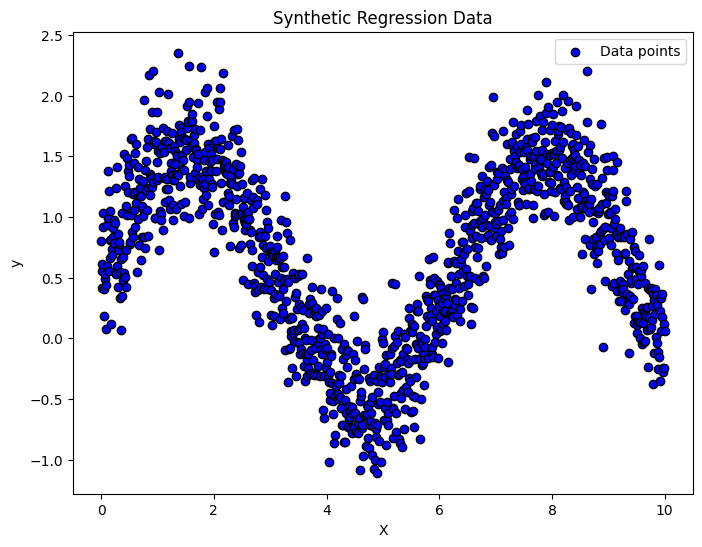

In [14]:
# Plotting the generated data
plt.figure(figsize=(8, 6))  # Set the figure size for the plot
plt.scatter(X, y, color='blue', edgecolor='k', label='Data points')  # Plot the data points
plt.title('Synthetic Regression Data')  # Title of the plot
plt.xlabel('X')  # Label for the x-axis
plt.ylabel('y')  # Label for the y-axis
plt.legend()  # Add a legend
plt.show()  # Display the plot


In [16]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=35)

# Function to train the Decision Tree Regressor and visualize the results
def train_and_plot(max_depth=3):
    # Initialize the Decision Tree Regressor with a specified maximum depth
    regressor = DecisionTreeRegressor(max_depth=max_depth)
    regressor.fit(X_train, y_train)  # Fit the model to the training data

    # Predict the target values using the trained model for the entire dataset
    y_pred = regressor.predict(X)

    # Plotting the actual data versus the model predictions
    plt.figure(figsize=(12, 6))
    plt.scatter(X, y, color='blue', label='Actual data', alpha=0.6)  # Scatter plot of the actual data
    plt.plot(X, y_pred, color='red', label='Model prediction', linewidth=2)  # Line plot of the model predictions
    plt.title('Decision Tree Regression')
    plt.xlabel('Feature value (X)')
    plt.ylabel('Target value (y)')
    plt.legend()
    plt.show()

    # Plotting the structure of the decision tree
    plt.figure(figsize=(20, 10))
    plot_tree(regressor, filled=True)  # Visualize the decision tree
    plt.title('Decision Tree Structure')
    plt.show()

# Setup an interactive widget to adjust the maximum depth of the decision tree
interact(train_and_plot, max_depth=IntSlider(min=1, max=10, step=1, value=3, description='Tree Depth'))


interactive(children=(IntSlider(value=3, description='Tree Depth', max=10, min=1), Output()), _dom_classes=('w…

<function __main__.train_and_plot(max_depth=3)>

### Interactive Decision Tree Regression with Visualizations

This provides an interactive demonstration of training a Decision Tree Regressor and visualizing both its predictions and its internal structure.

#### Detailed Explanation and Functions Used:

- **Decision Tree Regressor**:
  - `DecisionTreeRegressor()`: A regression model that uses a decision tree to predict the target variable based on input features. It is initialized with a `max_depth` parameter, which controls the maximum depth of the tree, affecting both the complexity and the potential for overfitting.
  - `fit()`: This method trains the decision tree on the training data, learning how to map input features to the target variable.
  - `predict()`: After training, this method is used to predict the target values for the given input data, allowing us to visualize the model's overall fit to the data.

- **Visualization**:
  - **Plotting Actual vs. Predicted Data**:
    - Uses `matplotlib.pyplot` to create scatter plots for actual data and line plots for the model predictions. This visualization helps assess how well the decision tree has learned to predict the underlying pattern of the data.
  - **Plotting the Decision Tree**:
    - `plot_tree()`: Visualizes the trained decision tree, showing the decisions made at each node and how these lead to the final predictions. This is helpful for understanding the decision-making process of the model and for educational purposes to explain how tree-based models work.